# 🧠 Student Depression Prediction
Machine Learning Project for Mental Health Analytics

**Author:** Radithya Fawwaz Aydin  
**Project Type:** Predictive Analytics & Classification

---

📋 Project Overview

Kesehatan mental mahasiswa telah menjadi isu global yang semakin mengkhawatirkan. Tingkat stres akademik, tekanan finansial, dan perubahan gaya hidup dapat berkontribusi terhadap risiko depresi di kalangan mahasiswa. Proyek ini mengembangkan sistem prediktif berbasis machine learning untuk **mendeteksi kecenderungan depresi pada mahasiswa** berdasarkan berbagai faktor risiko.

🎯 Project Objectives

1. **Analisis Faktor Risiko**: Mengidentifikasi faktor-faktor yang paling berpengaruh terhadap depresi mahasiswa
2. **Model Prediktif**: Membangun model machine learning untuk memprediksi risiko depresi
3. **Data-Driven Insights**: Memberikan wawasan berbasis data untuk pengambilan keputusan dalam kesehatan mental kampus

---

*Proyek ini bertujuan untuk memberikan kontribusi positif dalam bidang kesehatan mental dengan memanfaatkan kekuatan data science dan machine learning.*

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import plotly.express as px
import warnings  

# Ignore all warnings  
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
%matplotlib inline

# Load Dataset

Pada tahap ini, dataset `student_depression_dataset.csv` dimuat ke dalam DataFrame `df`. Setelah itu, dilakukan eksplorasi awal untuk memahami struktur data:

- `df.info()`: Memberikan informasi umum tentang dataset, seperti jumlah entri, tipe data setiap kolom, dan jumlah nilai non-null.
- `df.describe()`: Menampilkan statistik deskriptif dari kolom numerik, seperti mean, standard deviation, min, dan max.
- `df.shape`: Menginformasikan dimensi dataset, yakni jumlah baris (mahasiswa) dan kolom (fitur).

Langkah ini penting sebagai dasar untuk memahami karakteristik data sebelum masuk ke tahap pembersihan dan pemodelan lebih lanjut.

In [4]:
# Load dataset
df = pd.read_csv('student_depression_dataset.csv')
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [5]:
# Info mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [6]:
# Penjelasan mengenai statistik deskriptif
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [7]:
# Bentuk dari dataset
df.shape

(27901, 18)

# Data Cleaning & Preprocessing

Tahapan ini mencakup proses pembersihan dan penyiapan data sebelum digunakan untuk pemodelan. Kegiatan utama dibagi menjadi tiga bagian:

1️⃣ Convert & Clean Data Types
- Mengidentifikasi dan menghapus nilai `0` yang tidak logis pada kolom seperti **Academic Pressure**, **CGPA**, dan **Study Satisfaction**, karena dianggap bukan nilai valid.
- Menghapus kolom yang tidak relevan atau redundan seperti `id`, `Work Pressure`, dan `Job Satisfaction`.
- Melakukan normalisasi nilai kategori, misalnya pada kolom `Gender` dan `Financial Stress`.
- Mengubah tipe data ke `category` untuk kolom-kolom kategorikal seperti `Profession`, `Degree`, `Dietary Habits`, dll.
- Mengekstrak nilai numerik dari kolom `Sleep Duration` yang sebelumnya berbentuk teks, menggunakan regex.

2️⃣ Handling Missing Values
- Mengidentifikasi nilai `missing` (NaN) pasca konversi dan ekstraksi.
- Mengisi nilai kosong pada kolom `Sleep Duration` dengan **median** agar tidak bias terhadap outlier.

3️⃣ Outlier Detection & Removal
- Menerapkan metode **IQR (Interquartile Range)** pada seluruh kolom numerik untuk mendeteksi dan menghapus outlier.
- Hanya data yang berada dalam rentang Q1 - 1.5*IQR dan Q3 + 1.5*IQR yang dipertahankan untuk meningkatkan kualitas distribusi data.

📌 Tahapan ini bertujuan untuk memastikan data bersih, konsisten, dan siap untuk dianalisis atau digunakan dalam pemodelan prediktif.

## Convert and Clean Data Types

In [8]:
# Drop kolom yang memiliki nilai 0 (kecuali kolom target & Work/Study Hours)
academic_pressure = (df['Academic Pressure'] == 0).sum()
work_pressure = (df['Work Pressure'] == 0).sum()
cgpa = (df['CGPA'] == 0).sum()
study_satisfaction = (df['Study Satisfaction'] == 0).sum()
job_satisfaction = (df['Job Satisfaction'] == 0).sum()

print("Nilai 0 di dalam kolom Academic Pressure ada: ", academic_pressure)
print("Nilai 0 di dalam kolom Work Pressure ada: ", work_pressure)
print("Nilai 0 di dalam kolom CGPA ada: ", cgpa)
print("Nilai 0 di dalam kolom Study Satisfaction ada: ", study_satisfaction)
print("Nilai 0 di dalam kolom Job Satisfaction ada: ", job_satisfaction)

Nilai 0 di dalam kolom Academic Pressure ada:  9
Nilai 0 di dalam kolom Work Pressure ada:  27898
Nilai 0 di dalam kolom CGPA ada:  9
Nilai 0 di dalam kolom Study Satisfaction ada:  10
Nilai 0 di dalam kolom Job Satisfaction ada:  27893


In [9]:
# Drop kolom work pressure, id, Job Satisfaction
df.drop(columns=['Work Pressure','id', 'Job Satisfaction'], inplace=True)

# Hapus nilai 0 di kolom academic pressure, cgpa, dan Study Satisfaction
df = df.loc[(df[['Academic Pressure', 'CGPA', 'Study Satisfaction']]!=0).all(axis=1)]

In [10]:
# Validasi Ulang nilai kategori
df['Gender'] = df['Gender'].str.strip().str.lower().map({'male':'Male', 'female':'Female'})
df['Financial Stress'] = df['Financial Stress'].str.strip().str.title()

In [11]:
# Convert kolom object yang harus menjadi kategorikal
categorical_columns = ['Gender', 'Profession', 'Degree','Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Check unik value di beberapa kolom untuk menentukan cleaning strategy
print("Unique values in 'Sleep Duration':", df['Sleep Duration'].unique())
print("Unique values in 'Financial Stress':", df['Financial Stress'].unique())


Unique values in 'Sleep Duration': ["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']
Unique values in 'Financial Stress': ['1.0' '2.0' '5.0' '3.0' '4.0' '?']


In [12]:
# Kita buat function to extract numeric hours dari kolom 'Sleep Duration'
def extract_hours(s):
    # Find a numbers (include decimals)
    match = re.search(r"(\d+(\.\d+)?)", str(s))
    return float(match.group(1)) if match else np.nan

df['Sleep Duration'] = df['Sleep Duration'].apply(extract_hours)

# Convert Financial Stress ke kategorikal if represent levels
df['Financial Stress'] = df['Financial Stress'].astype('category')

# Verify perubahan
print(df[['Sleep Duration', 'Financial Stress']].head())

   Sleep Duration Financial Stress
0             5.0              1.0
1             5.0              2.0
2             5.0              1.0
3             7.0              5.0
4             5.0              1.0


## Check for Missing Values

In [13]:
# display missing values per kolom
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Gender                                    0
Age                                       0
City                                      0
Profession                                0
Academic Pressure                         0
CGPA                                      0
Study Satisfaction                        0
Sleep Duration                           18
Dietary Habits                            0
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
Depression                                0
dtype: int64


In [14]:
# Ubah nilai missing values dengan median
for col in ['Sleep Duration']:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


## Pengecekan Outliers

In [15]:
# Terapkan IQR
numeric_cols = df.select_dtypes(include='number').columns

Q1 =  df[numeric_cols].quantile(.25)
Q3 =  df[numeric_cols].quantile(.75)
IQR = Q3 - Q1

filter_outliers = ~((df[numeric_cols] < ( Q1 - 1.5 * IQR)) | (df[numeric_cols] > ( Q3 + 1.5 * IQR))).any(axis=1)
df = df[filter_outliers]
df.shape

(27875, 15)

# EDA

Tahapan EDA bertujuan untuk memahami struktur dan pola dalam dataset, serta mengidentifikasi hubungan antara variabel terhadap target (`Depression`). Berikut adalah rekap eksplorasi yang dilakukan:

1️⃣ Distribusi Target
- Visualisasi distribusi kelas target `Depression` menunjukkan proporsi siswa yang mengalami atau tidak mengalami depresi.
- Disertai dengan perhitungan **proporsi masing-masing kelas** untuk mengidentifikasi potensi class imbalance.

2️⃣ Analisis Variabel Kategorikal terhadap Target
- Menggunakan **countplot dan stacked bar** untuk menunjukkan distribusi `Depression` berdasarkan fitur-fitur kategorikal seperti `Gender`, `Profession`, `Dietary Habits`, dan lainnya.
- Crosstab dengan persentase memudahkan identifikasi fitur yang berkorelasi tinggi dengan depresi (misalnya riwayat suicidal thoughts atau kondisi mental keluarga).

3️⃣ Distribusi Variabel Numerik
- Histogram untuk seluruh fitur numerik (`Age`, `CGPA`, `Academic Pressure`, dll) digunakan untuk mengecek sebaran data, apakah normal, skewed, atau multimodal.

4️⃣ Boxplot Numerik vs Target
- Visualisasi boxplot memperlihatkan perbedaan nilai variabel numerik antara kelompok yang mengalami dan tidak mengalami depresi.
- Bermanfaat untuk mendeteksi perbedaan signifikan dan potensi outlier.

5️⃣ Korelasi Antar Fitur Numerik
- Heatmap korelasi memberikan insight terhadap hubungan linear antar fitur numerik.
- Memudahkan pemilihan fitur saat feature engineering atau pemodelan.

6️⃣ Visualisasi Interaktif: CGPA vs Study Satisfaction
- Scatter plot interaktif memetakan relasi antara `CGPA` dan `Study Satisfaction` terhadap label `Depression`.
- Ditambahkan informasi demografi (usia, gender, tekanan akademik) pada hover untuk analisis lebih mendalam.

7️⃣ Pairplot Interaksi Fitur
- Pairplot menampilkan visualisasi interaksi antar fitur penting, dengan pewarnaan berdasarkan label target.
- Berguna untuk melihat clustering atau pola visual antara siswa yang depresi dan tidak.

📌 EDA ini memperkuat pemahaman kita tentang distribusi, hubungan, dan pola dalam data, sekaligus menjadi dasar yang kokoh untuk proses pemodelan lebih lanjut.

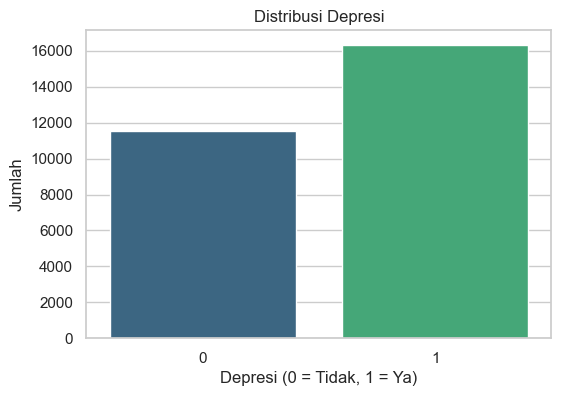


Proporsi Kelas Target:
Depression
1    0.585722
0    0.414278
Name: proportion, dtype: float64


In [16]:
# 1. Distribusi Target
plt.figure(figsize=(6,4))
sns.countplot(x='Depression', data=df, palette="viridis")
plt.title("Distribusi Depresi")
plt.xlabel("Depresi (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah")
plt.show()
    
print("\nProporsi Kelas Target:")
print(df['Depression'].value_counts(normalize=True))


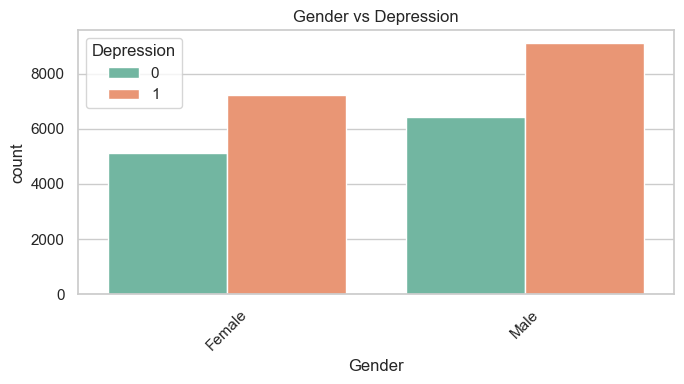

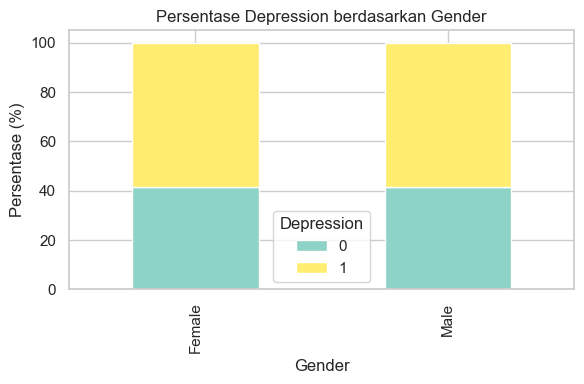

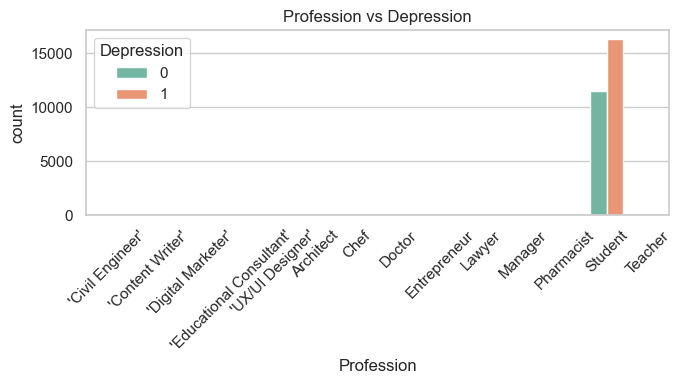

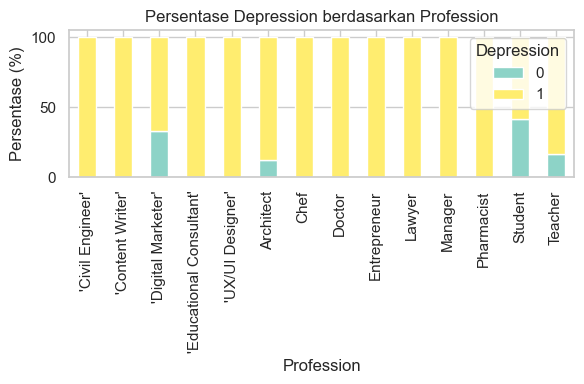

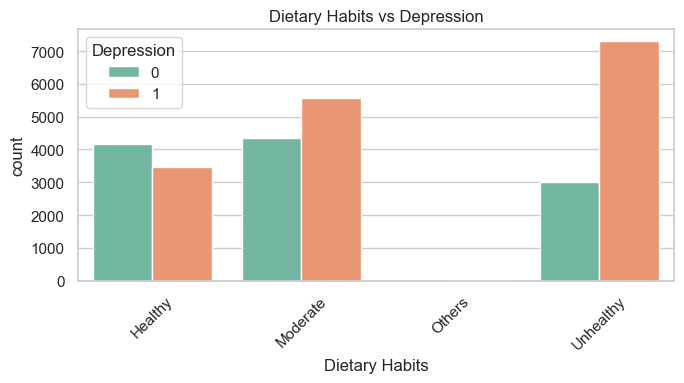

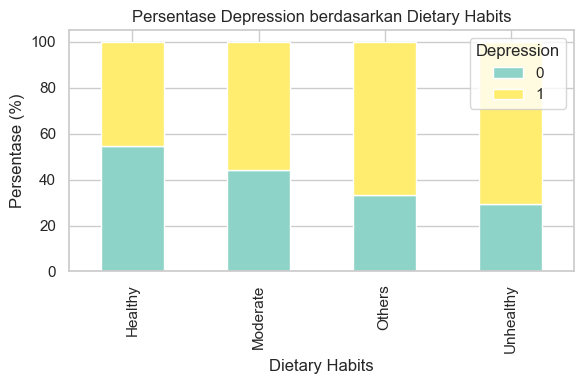

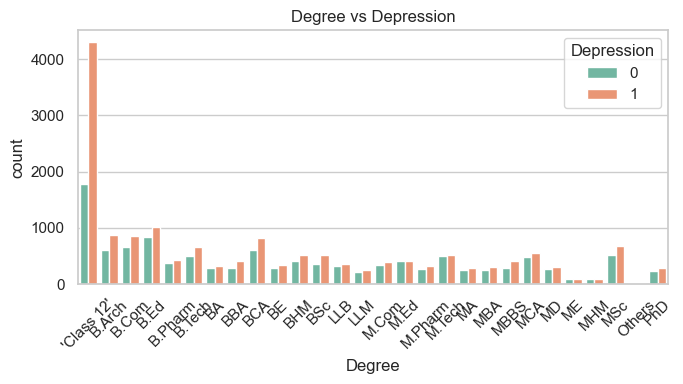

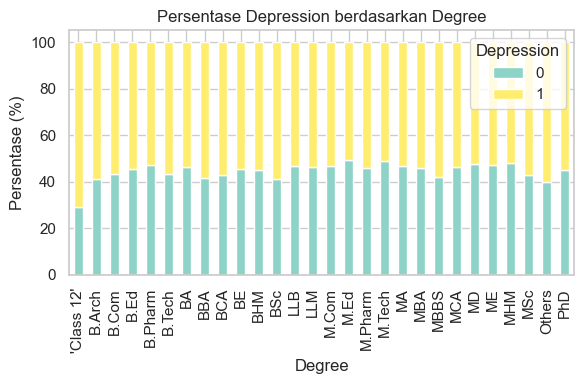

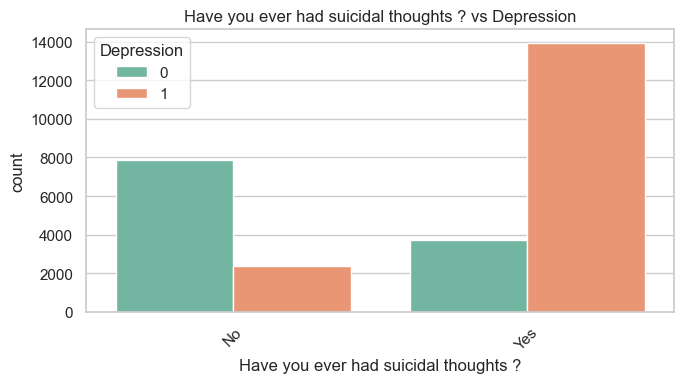

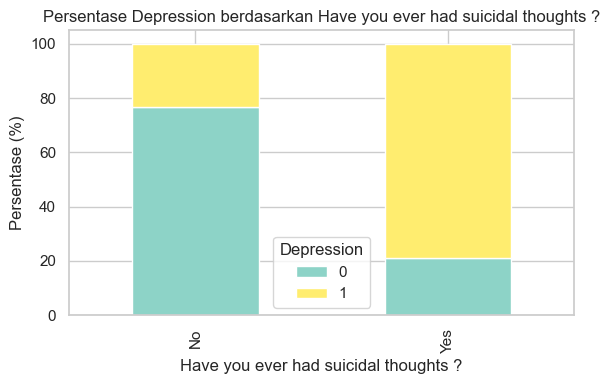

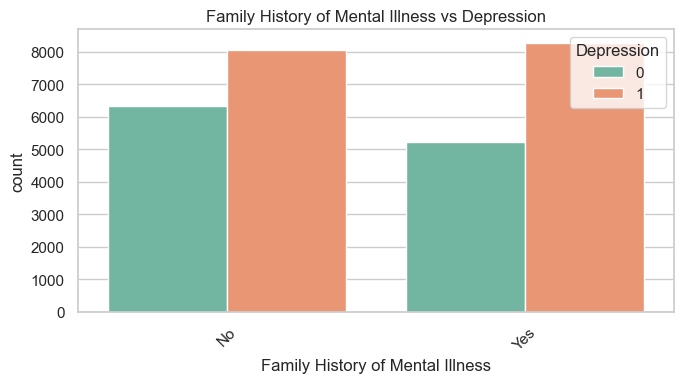

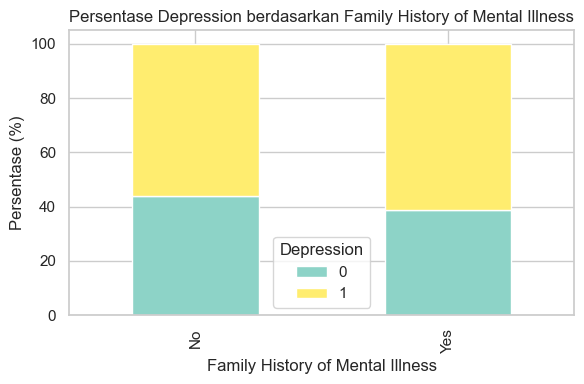

In [17]:
# 2. Kategorikal vs Target
cat_cols = ['Gender', 'Profession', 'Dietary Habits', 'Degree', 
                'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
    
for col in cat_cols:
        plt.figure(figsize=(7,4))
        sns.countplot(x=col, hue='Depression', data=df, palette="Set2")
        plt.title(f"{col} vs {'Depression'}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Crosstab % analysis
        ct = pd.crosstab(df[col], df['Depression'], normalize='index') * 100
        ct.plot(kind='bar', stacked=True, colormap='Set3', figsize=(6,4))
        plt.title(f"Persentase {'Depression'} berdasarkan {col}")
        plt.ylabel("Persentase (%)")
        plt.tight_layout()
        plt.show()

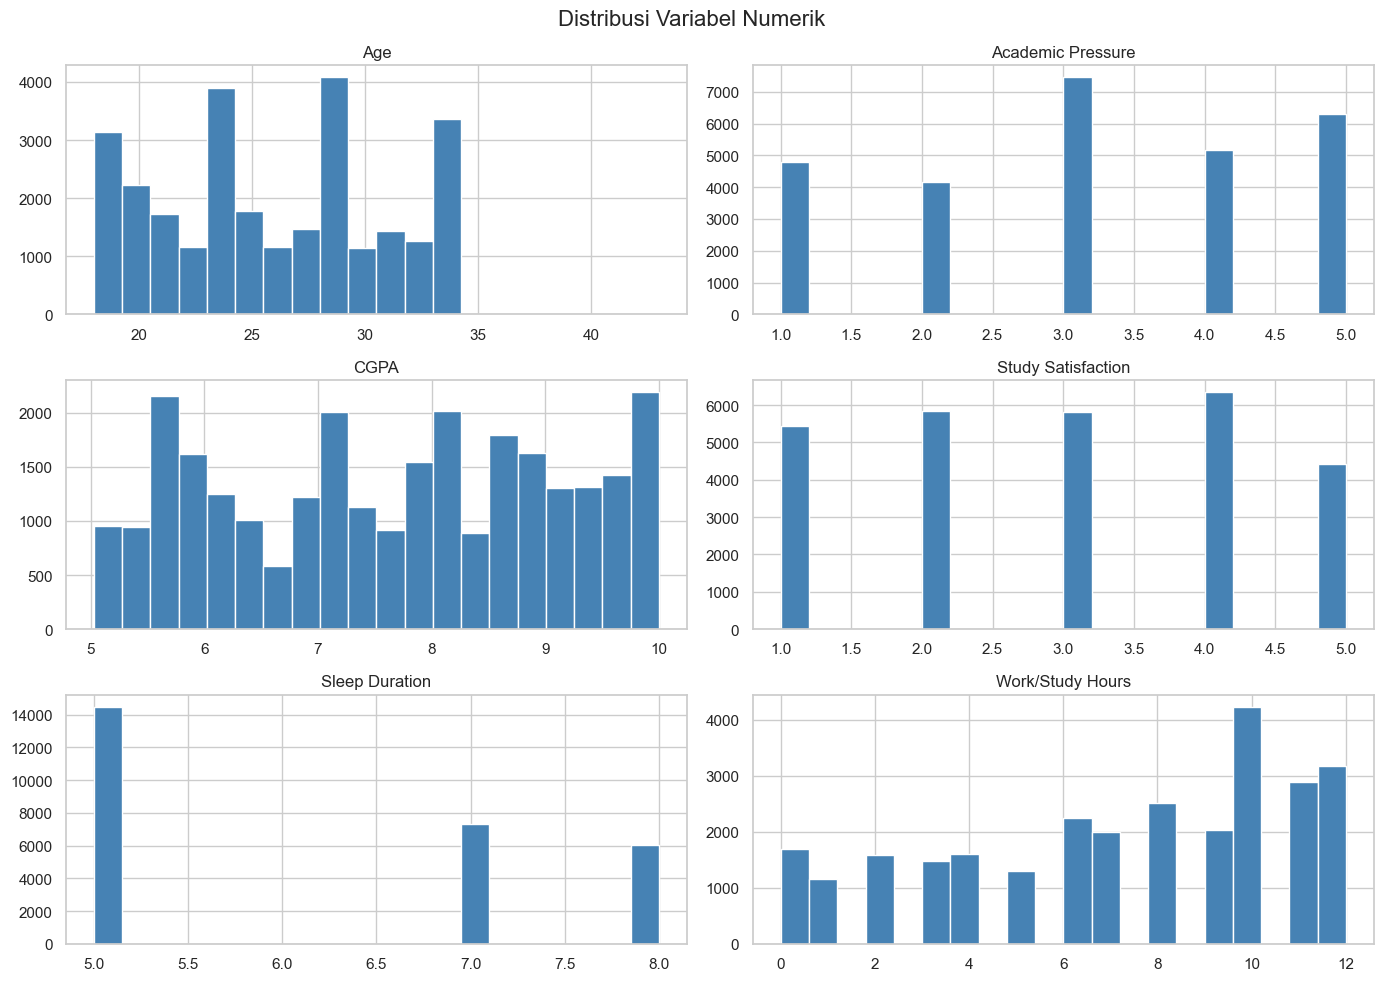

In [18]:
# 3. Distribusi Fitur Numerik
num_cols = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 
            'Sleep Duration', 'Work/Study Hours']
    
df[num_cols].hist(bins=20, figsize=(14, 10), color='steelblue')
plt.suptitle("Distribusi Variabel Numerik", fontsize=16)
plt.tight_layout()
plt.show()

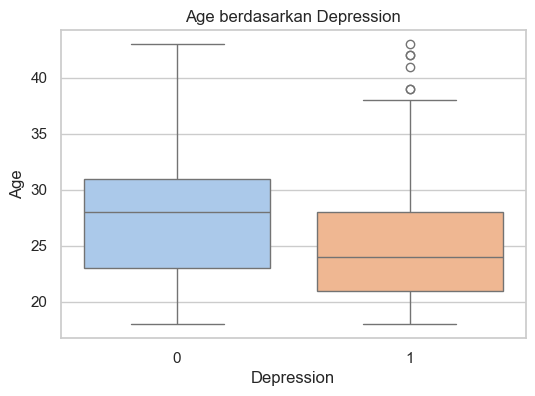

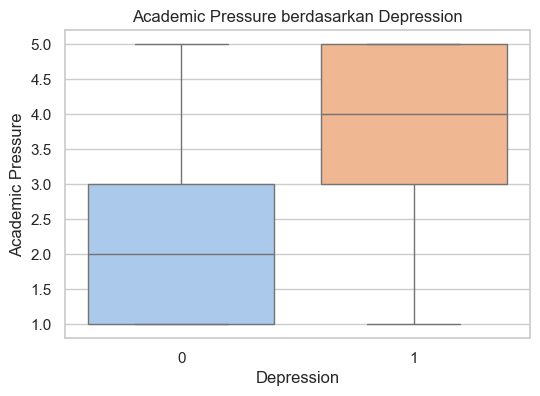

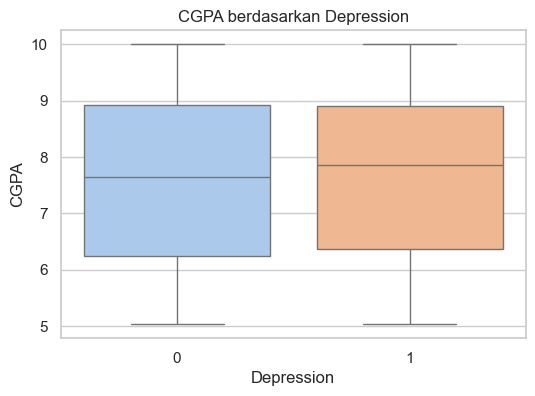

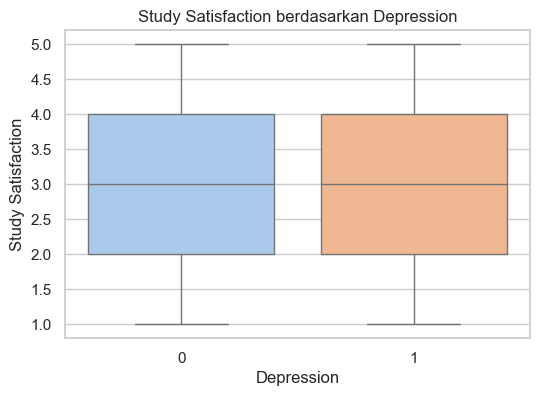

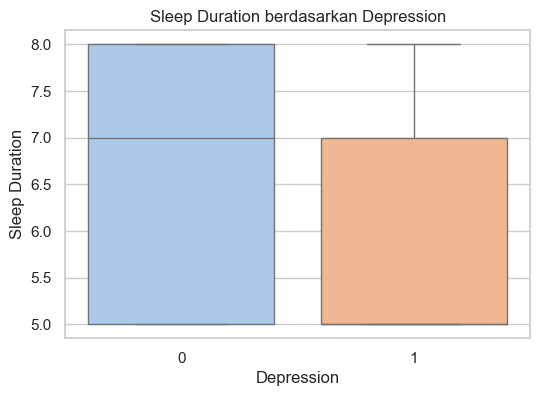

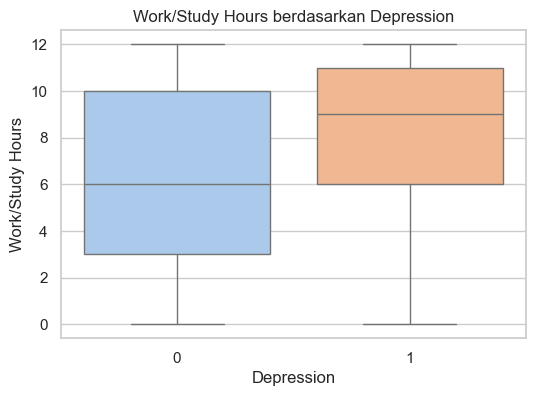

In [19]:
# 4. Boxplot Numerik vs Target
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Depression', y=col, data=df, palette="pastel")
    plt.title(f"{col} berdasarkan {'Depression'}")
    plt.show()


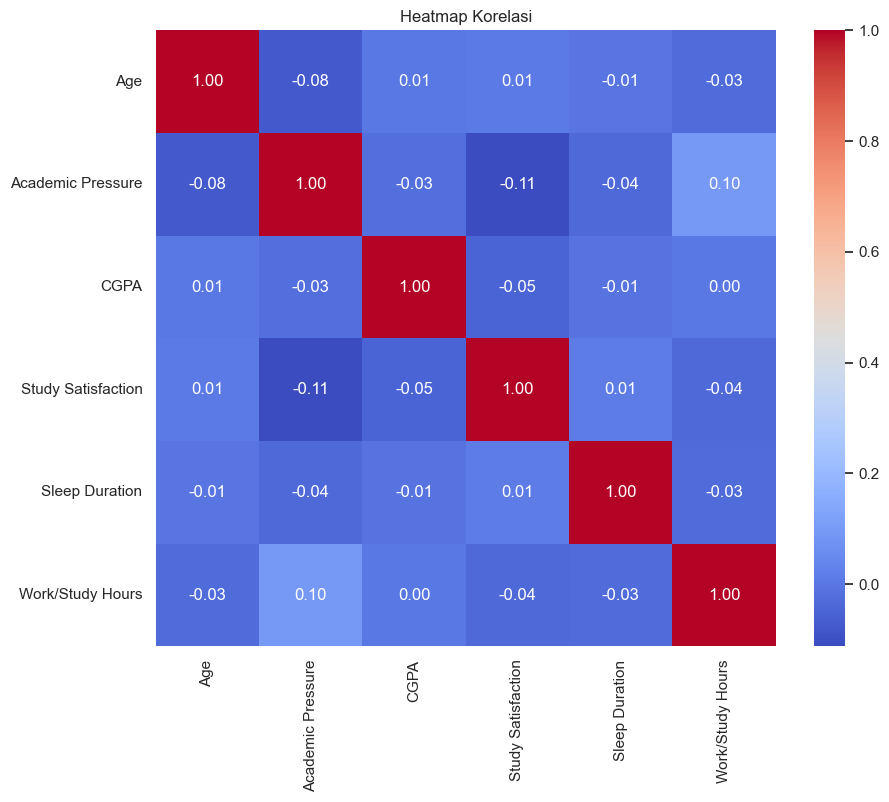

In [20]:
 # 5. Korelasi Variabel Numerik
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()

In [21]:
# 6. Interaktif: CGPA vs Study Satisfaction
if 'CGPA' in df.columns and 'Study Satisfaction' in df.columns:
    fig = px.scatter(df, x="CGPA", y="Study Satisfaction", 
                    color='Depression', 
                    hover_data=['Age', 'Gender', 'Academic Pressure'],
                    title="CGPA vs Study Satisfaction by Depression")
    fig.show()

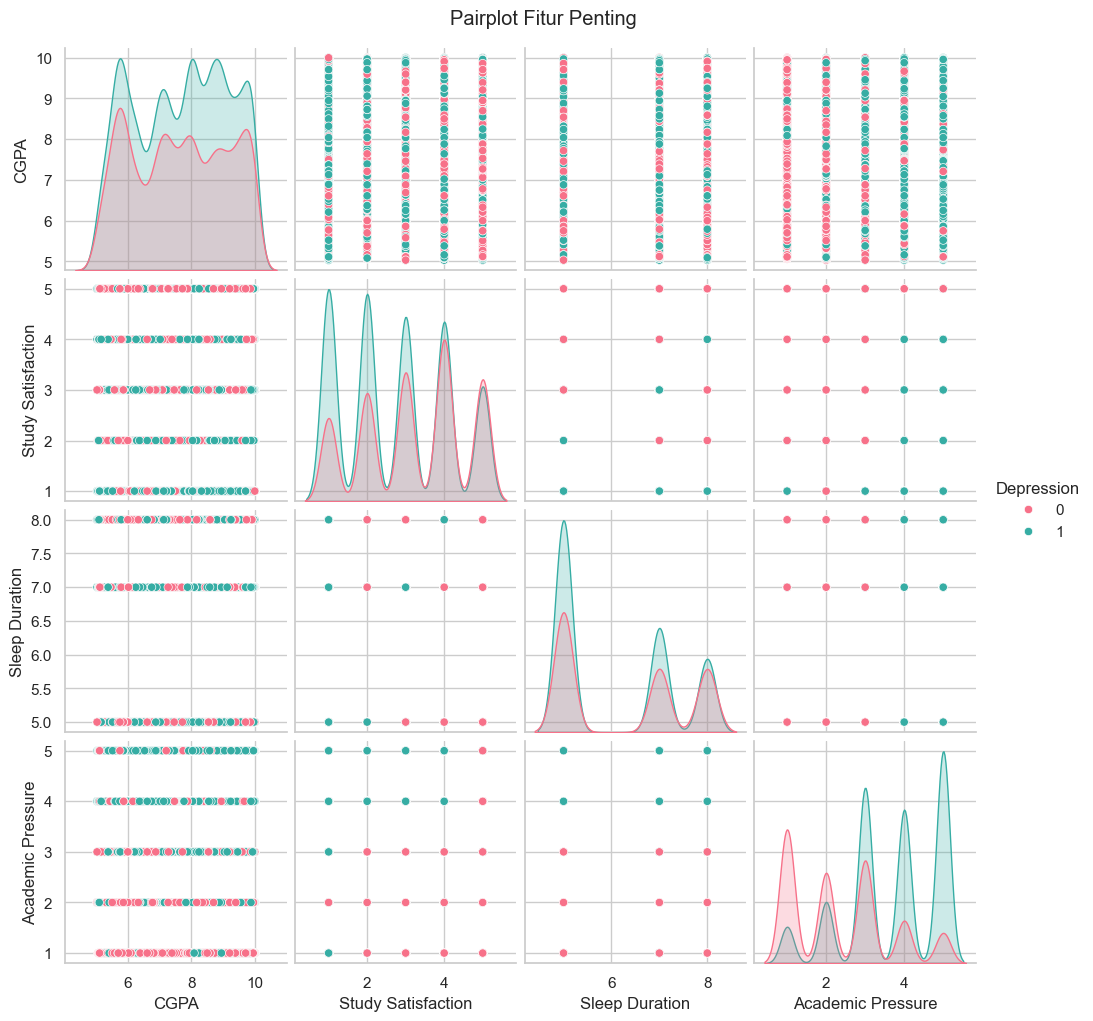

In [22]:
# 7. Pairplot Visualisasi Interaksi Fitur
sns.pairplot(df[['CGPA', 'Study Satisfaction', 'Sleep Duration', 
                'Academic Pressure', 'Depression']], hue='Depression', palette="husl")
plt.suptitle("Pairplot Fitur Penting", y=1.02)
plt.show()

# Data Preparation

- **Target Variable**: `Depression` (variabel yang diprediksi)
- **Features**: Semua kolom lainnya sebagai variabel input
- **Identifikasi Tipe Data**:
  - Fitur kategorikal: kolom dengan tipe `category` atau `object`
  - Fitur numerik: kolom dengan tipe `int64` atau `float64`

### 🔧 Pipeline Preprocessing

#### Pipeline Kategorikal
1. **Imputation**: Mengisi missing values dengan nilai yang paling sering muncul
2. **One-Hot Encoding**: Mengubah kategori menjadi variabel dummy

#### Pipeline Numerik  
1. **Imputation**: Mengisi missing values dengan nilai rata-rata
2. **Standardization**: Menormalisasi skala data menggunakan StandardScaler

#### 📈 Dimensionality Reduction (PCA)
- **Analisis Komponen**: Visualisasi cumulative explained variance untuk menentukan jumlah komponen optimal
- **PCA Implementation**: Mengurangi dimensi data menjadi **25 komponen utama**
- **Tujuan**: Mengurangi kompleksitas dan noise sambil mempertahankan informasi penting

### 🎯 Data Splitting
- **Training Set**: 80% dari data
- **Test Set**: 20% dari data  
- **Stratified Split**: Mempertahankan proporsi kelas target pada kedua set
- **Random State**: 42 (untuk reproducibility)

### 📋 Hasil Akhir
Dataset siap untuk proses modeling dengan:
- Fitur yang telah dipreprocessing dan dinormalisasi
- Dimensi yang telah direduksi untuk efisiensi komputasi
- Pembagian data yang seimbang untuk training dan testing

In [23]:
# Pisahkan fitur dan target
X = df.drop(columns=['Depression'])
y = df['Depression']

# Identifikasi tipe kolom
cat_features = X.select_dtypes(include=['category', 'object']).columns.tolist()
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [24]:
# Pipeline kategorikal: impute + one-hot encode
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline numerik: impute + scaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Gabungkan dengan ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [25]:
# Transform data
X_processed = preprocessor.fit_transform(X)

# Dimensi hasil encoding
print(f"Shape setelah preprocessing: {X_processed.shape}")

Shape setelah preprocessing: (27875, 116)


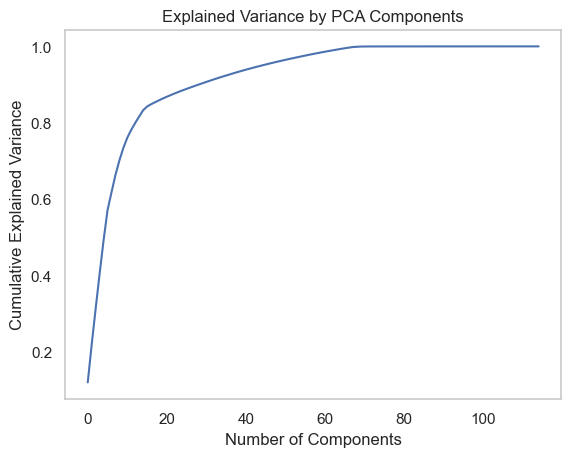

In [26]:
# Cek explained variance per komponen
pca_check = PCA().fit(X_processed)
plt.plot(np.cumsum(pca_check.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid()
plt.show()

In [27]:
# PCA, mengubah keseluruhan dataset ke 25 kolom utama
pca = PCA(n_components=25, random_state=42)
X_pca = pca.fit_transform(X_processed)

print(f"Shape setelah PCA: {X_pca.shape}")

Shape setelah PCA: (27875, 25)


In [28]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)

Train size: (22300, 25)
Test size : (5575, 25)


# Model Building



🤖 Model yang Digunakan

1. Logistic Regression
- **Algoritma**: Regresi logistik untuk klasifikasi biner
- **Parameter**: `max_iter=1000` untuk konvergensi yang stabil
- **Karakteristik**: Model linear yang mudah diinterpretasi

2. Random Forest Classifier  
- **Algoritma**: Ensemble method dengan multiple decision trees
- **Parameter**: `n_estimators=100` (100 pohon keputusan)
- **Karakteristik**: Model non-linear yang robust terhadap overfitting

📊 Evaluasi Model

Metrik Evaluasi yang Digunakan:
1. **Classification Report**: Precision, Recall, F1-score untuk setiap kelas
2. **Confusion Matrix**: Visualisasi prediksi benar vs salah
3. **ROC Curve & AUC**: Kemampuan model membedakan kelas positif dan negatif

Visualisasi:
- **Confusion Matrix**: Heatmap dengan warna berbeda (Blues untuk Logistic, Greens untuk Random Forest)
- **ROC Curve**: Grafik performa model dengan area under curve (AUC) sebagai ukuran kualitas

🎯 Output yang Dihasilkan

Untuk setiap model akan ditampilkan:
- Laporan klasifikasi lengkap (precision, recall, f1-score)
- Confusion matrix dalam bentuk heatmap
- ROC curve dengan nilai AUC untuk mengukur kemampuan diskriminasi model

📈 Tujuan Perbandingan
Membandingkan performa kedua model untuk memilih algoritma terbaik dalam memprediksi depresi berdasarkan:
- Akurasi prediksi
- Kemampuan mendeteksi kasus positif (recall)
- Kemampuan menghindari false positive (precision)
- Overall performance (AUC score)

## Logistic Regression Model

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      2310
           1       0.86      0.89      0.87      3265

    accuracy                           0.85      5575
   macro avg       0.85      0.84      0.84      5575
weighted avg       0.85      0.85      0.85      5575



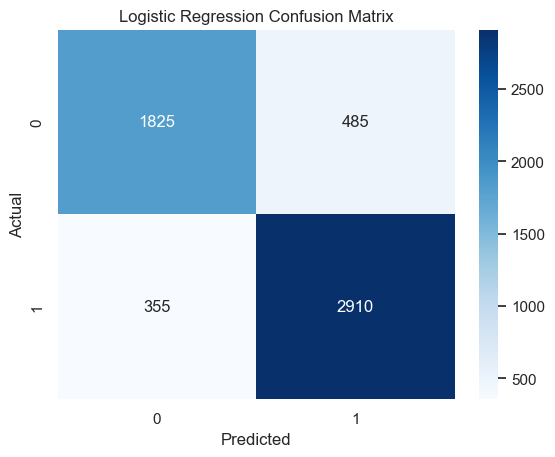

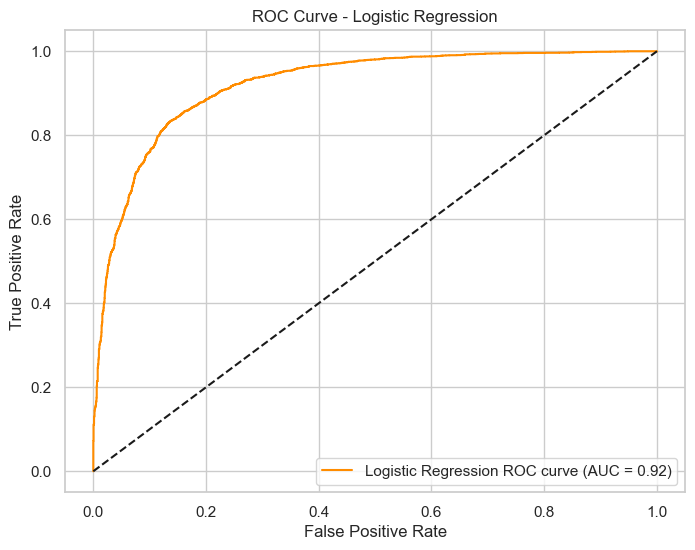

In [29]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt="d", cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_prob_log = log_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression ROC curve (AUC = {roc_auc_log:.2f})', color='darkorange')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## Random Forest Classifier

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2310
           1       0.86      0.88      0.87      3265

    accuracy                           0.85      5575
   macro avg       0.84      0.84      0.84      5575
weighted avg       0.85      0.85      0.85      5575



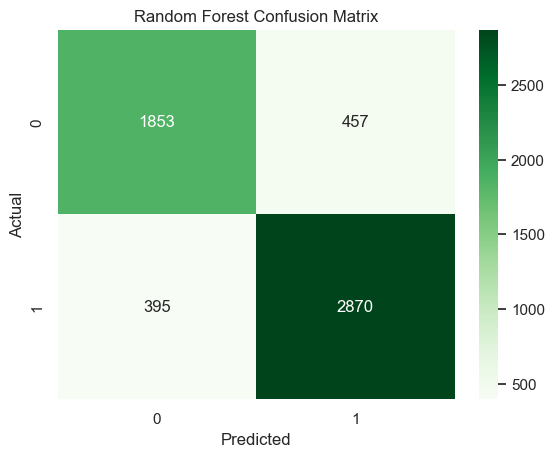

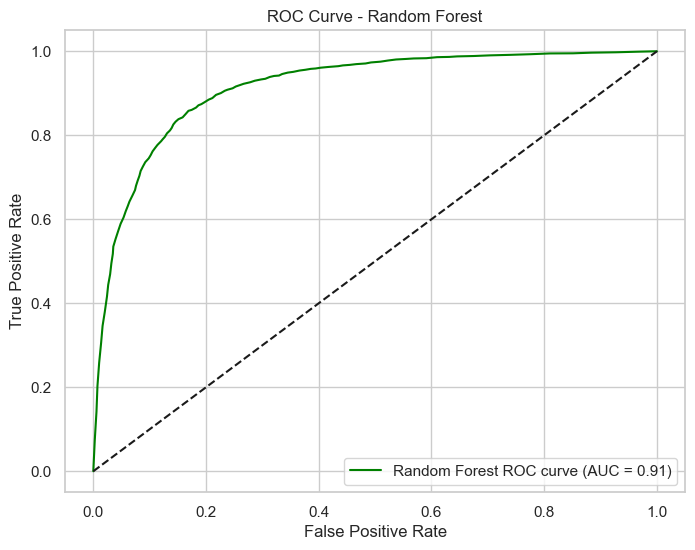

In [30]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for RF
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve for RF
y_prob_rf = rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest ROC curve (AUC = {roc_auc_rf:.2f})', color='green')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Hyperparameter Tuning

Grid Search Configuration
- **Model**: Random Forest Classifier 
- **Metode**: GridSearchCV dengan 3-fold cross validation
- **Parallelization**: `n_jobs=-1` untuk memanfaatkan semua CPU cores

Parameter Grid yang Diuji:
| Parameter | Values Tested | Penjelasan |
|-----------|---------------|------------|
| `n_estimators` | [100, 200] | Jumlah pohon dalam ensemble |
| `max_depth` | [None, 10, 20] | Kedalaman maksimal setiap pohon |
| `min_samples_split` | [2, 5] | Minimum sampel untuk split node |

Tujuan Tuning:
- **n_estimators**: Mencari keseimbangan antara performa dan computational cost
- **max_depth**: Mengontrol overfitting (None = unlimited depth)
- **min_samples_split**: Mengatur granularitas splitting untuk mencegah overfitting

📊 Feature Importance Analysis

Analisis Komponen PCA
- **Visualisasi**: Line plot menunjukkan kepentingan setiap komponen PCA
- **Interpretasi**: Komponen dengan importance tinggi berkontribusi lebih besar dalam prediction
- **Insight**: Membantu memahami komponen mana yang paling relevan untuk prediksi depresi

Output yang Dihasilkan:
1. **Best Parameters**: Kombinasi parameter optimal dari grid search
2. **Feature Importance Plot**: Grafik yang menunjukkan kontribusi relatif setiap komponen PCA

🎯 Manfaat Proses Ini
- **Model Optimization**: Meningkatkan performa model melalui parameter yang optimal
- **Feature Understanding**: Memahami komponen mana yang paling berpengaruh
- **Computational Efficiency**: Menemukan trade-off terbaik antara akurasi dan kecepatan

In [31]:

from sklearn.model_selection import GridSearchCV

# Definisi parameter grid untuk hyperparameter tuning
# Mencoba kombinasi berbagai parameter untuk menemukan yang optimal

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)

Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


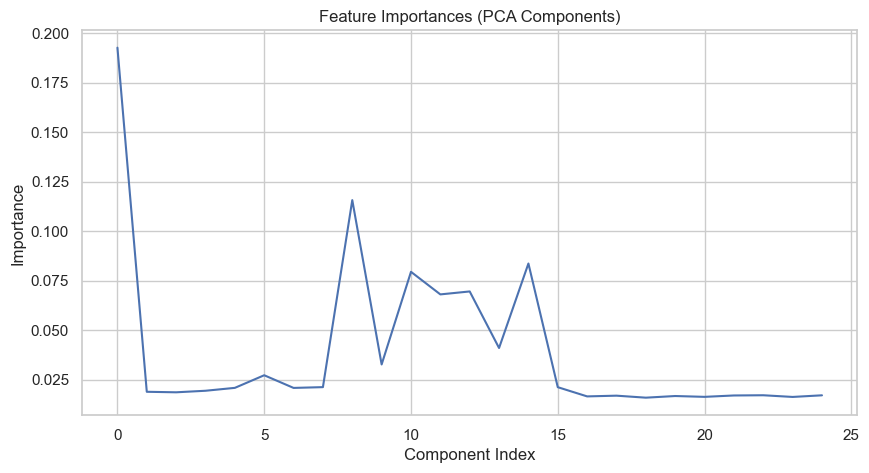

In [32]:
# Feature Importance (Random Forest)
importances = rf_model.feature_importances_
plt.figure(figsize=(10, 5))
plt.plot(importances)
plt.title("Feature Importances (PCA Components)")
plt.xlabel("Component Index")
plt.ylabel("Importance")
plt.show()

# Evaluasi Model

- 📊 Enhanced Confusion Matrix
Visualisasi yang Ditingkatkan

1. ConfusionMatrixDisplay: Penggunaan scikit-learn's built-in display untuk visualisasi yang lebih informatif
2. Custom Labels: Label yang jelas ("No Depression" vs "Depression") untuk interpretasi yang mudah
3. Color Scheme:
    - Blues untuk Logistic Regression
    - Greens untuk Random Forest



- 🔄 Cross-Validation Analysis
5-Fold Cross-Validation

Metode: Stratified 5-fold cross-validation
Metrik: Accuracy scoring
Dataset: Menggunakan seluruh dataset (X_pca dan y)

    - Tujuan Cross-Validation:

Model Stability: Mengukur konsistensi performa model across different data splits
Overfitting Detection: Membandingkan performa training vs validation
Generalization: Memastikan model dapat bekerja baik pada data yang belum pernah dilihat

    - Output yang Dihasilkan:

Array skor akurasi untuk setiap fold
Mean accuracy sebagai representasi performa keseluruhan
Perbandingan stabilitas antara Logistic Regression dan Random Forest

- 🎯 Prediction System
Fungsi predict_depression()
Sistem prediksi end-to-end yang mencakup:
Input Processing:

1. Raw Input: Dictionary dengan fitur mentah (seperti yang diinput user)
2. DataFrame Conversion: Mengubah dictionary menjadi pandas DataFrame
3. Preprocessing: Menerapkan pipeline preprocessing yang sama (imputation, encoding, scaling)
4. PCA Transformation: Mengurangi dimensi menggunakan model PCA yang telah dilatih

Prediction Output:

Class Prediction: 0 (No Depression) atau 1 (Depression)
Confidence Score: Probabilitas prediksi (0-1) untuk interpretasi tingkat keyakinan

Sample Input Testing
Pengujian fungsi prediksi dengan profil mahasiswa:

    - Demografi: Laki-laki, 23 tahun, Nashik
    - Akademik: Student MSc, CGPA 9.40, Academic Pressure 5.75
    - Risk Factors: Suicidal thoughts, family history, unhealthy diet, high work hours

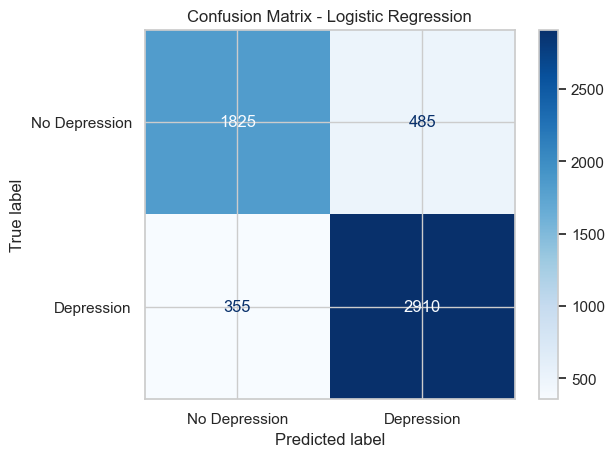

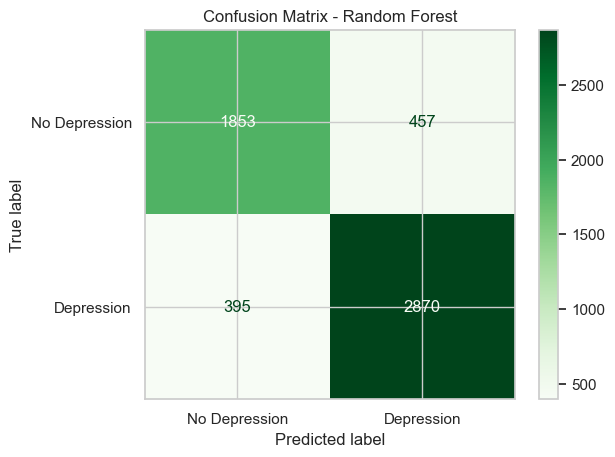

In [33]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Untuk Logistic Regression
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap="Blues", display_labels=["No Depression", "Depression"])
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Untuk Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="Greens", display_labels=["No Depression", "Depression"])
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [34]:
# Cross-validation for Logistic Regression
cv_scores_log = cross_val_score(log_model, X_pca, y, cv=5, scoring='accuracy')
print("5-Fold CV Accuracy for Logistic Regression:", cv_scores_log)
print("Mean CV Accuracy:", cv_scores_log.mean())

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X_pca, y, cv=5, scoring='accuracy')
print("5-Fold CV Accuracy for Random Forest:", cv_scores_rf)
print("Mean CV Accuracy:", cv_scores_rf.mean())

5-Fold CV Accuracy for Logistic Regression: [0.84125561 0.8509417  0.8444843  0.84538117 0.85273543]
Mean CV Accuracy: 0.8469596412556054
5-Fold CV Accuracy for Random Forest: [0.83623318 0.84717489 0.84197309 0.84394619 0.84843049]
Mean CV Accuracy: 0.8435515695067265


In [35]:
# Buat prediksi
def predict_depression(model, preprocessor, pca_model, raw_input):
    """
    Predict single input (dictionary) after preprocessing and PCA.
    """
    # Ubah dict jadi dataframe
    input_df = pd.DataFrame([raw_input])

    # Preprocess
    X_encoded = preprocessor.transform(input_df)
    X_pca = pca_model.transform(X_encoded)

    # Predict
    pred_class = model.predict(X_pca)[0]
    pred_prob = model.predict_proba(X_pca)[0][1]

    return {
        "prediction": int(pred_class),
        "confidence": float(pred_prob)
    }


sample_input = {
    "Age": 23,
    "Gender": "Male",
    "Sleep Duration": 6.5,
    "City" : "Nashik",
    "Profession": "Student",
    "Academic Pressure":5.75,
    "CGPA": 9.40,
    "Financial Stress": 5.0,
    "Study Satisfaction" : 2.0,
    "Dietary Habits": "Unhealthy",
    "Degree": "MSc",
    "Have you ever had suicidal thoughts ?": "Yes",
    "Work/Study Hours": 9.0,
    "Family History of Mental Illness": "Yes",
    
    
}

result = predict_depression(rf_model, preprocessor, pca, sample_input)
print("Prediction:", result['prediction'])
print("Confidence:", result['confidence'])

Prediction: 1
Confidence: 0.88
